In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Iterable, Tuple, Optional
from itertools import cycle

In [23]:
# Docking score distributions with KDE + hist (matplotlib only)
# - No seaborn required
# - Auto-detects common score column names, or pass one explicitly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_docking(files, original_ligand_score, score_col=None, bins="auto"):
    """
    files: dict like {"Generated": "gen.csv", "Enamine HTVS": "enamine.csv", ...}
    original_ligand_score: float
    score_col: set if your CSVs use a specific column name (e.g., "docking_score")
    """
    # Load & pick a score column
    common_names = {"Best_Score"}
    
    series = []
    for label, path in files.items():
        df = pd.read_csv(path)
        col = (score_col if score_col and score_col in df.columns else
               next((c for c in df.columns if c.lower() in common_names), None))
        if col is None:
            col = next((c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])), None)
        if col is None:
            raise ValueError(f"Couldn't find a numeric score column in {path}.")
        vals = pd.to_numeric(df[col], errors="coerce").dropna().values
        series.append((label, vals))

    # Common bins across all sets so histograms align
    all_vals = np.concatenate([v for _, v in series])
    if bins == "auto":
        _, edges = np.histogram(all_vals, bins="auto")
        bins = edges

    # Prepare plot
    fig, ax = plt.subplots(figsize=(7, 4.5))
    xs = np.linspace(-16, 0, 512)
    colors = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

    # KDE if SciPy is available (optional, kept tiny)
    try:
        from scipy.stats import gaussian_kde
        use_kde = True
    except Exception:
        use_kde = False

    # Draw each distribution
    for label, vals in series:
        c = next(colors)
        # Transparent histogram (no legend label to avoid duplicates when KDE is used)
        # ax.hist(vals, bins=bins, density=True, alpha=0.25, color=c, edgecolor="none",
        #         linewidth=0, label=None)
        # Deep line with the SAME color
        if use_kde and vals.size > 1:
            kde = gaussian_kde(vals, bw_method=1.5)
            ax.plot(xs, kde(xs), color=c, lw=2.2, label=label)

    # Original ligand line
    ax.axvline(original_ligand_score, linestyle="--", linewidth=1.5, label="original ligand")

    # Axes: ticks from −12 to 0
    ax.set_xlim(-16, 0)
    ax.set_ylim(0, 1)
    ax.set_xticks(np.arange(-16, 1, 2))
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.set_xlabel("Docking score", fontsize=18)
    ax.set_ylabel("Density", fontsize=18)
    ax.legend(fontsize=14)
    
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    plt.savefig("docking_distributions.png", dpi=300, bbox_inches="tight")
    plt.show()

# ---- Example ----
# files = {
#     "Generated molecules": "generated_scores.csv",
#     "Enamine HTVS": "enamine_htvs.csv",
#     "Active molecules": "actives.csv",
# }
# plot_docking(files, original_ligand_score=-8.3, score_col=None)


for 5l7i:

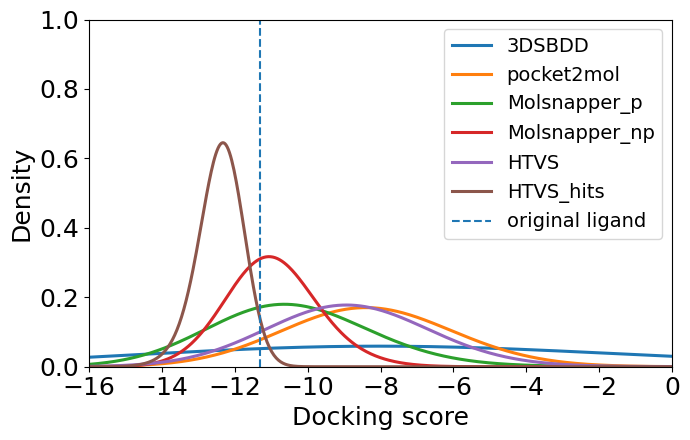

In [71]:
# ---------------------------
# Example usage (edit paths):
# ---------------------------
files = {
    "3DSBDD": "5l7i/3dsbdd/best_vina_docking_scores_scrub.csv",
    "pocket2mol": "5l7i/p2m/best_vina_docking_scores.csv",
    "Molsnapper_p": "5l7i/molsnapper/use_pharma_true/best_vina_docking_scores.csv",
    'Molsnapper_np': '5l7i/molsnapper/use_pharma_false/best_vina_docking_scores.csv',
    "HTVS": "5l7i/5l7i_cpu_best_result.csv",
    "HTVS_hits": "5l7i/best_vina_docking_scores_top500.csv",
}
original = -11.3  # replace with your ligand’s docking score
plot_docking(files, original, score_col='Best_Score')

for 7cky:

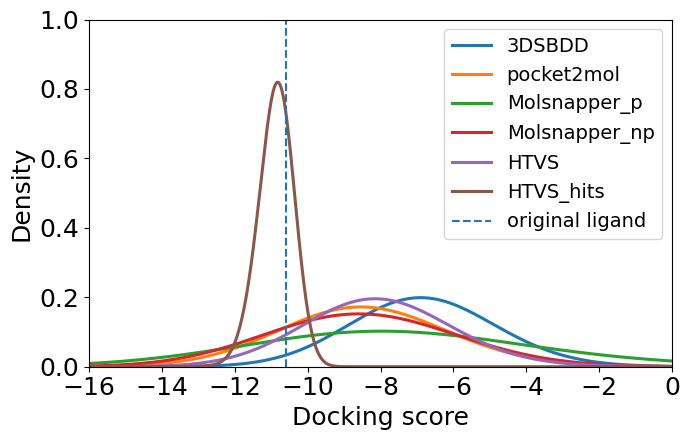

In [72]:
# ---------------------------
# Example usage (edit paths):
# ---------------------------
files = {
    "3DSBDD": "7cky/3dsbdd/best_vina_docking_scores.csv",
    "pocket2mol": "7cky/p2m/best_vina_docking_scores.csv",
    "Molsnapper_p": "7cky/molsnapper/use_pharma_true/best_vina_docking_scores.csv",
    'Molsnapper_np': '7cky/molsnapper/use_pharma_false/best_vina_docking_scores.csv',
    "HTVS": "7cky/7cky_cpu_best_result.csv",
    "HTVS_hits": "7cky/best_vina_docking_scores_top500.csv",                                                                                                                                            
}                                                                                                       
original = -10.6 # replace with your ligand’s docking score
plot_docking(files, original, score_col='Best_Score')                                                                               

For 7wf5:

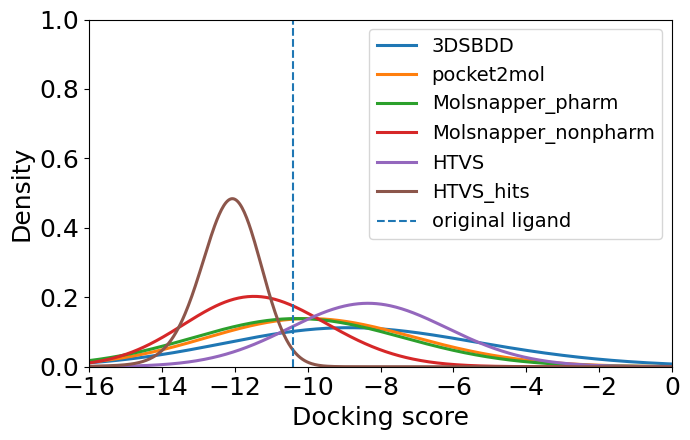

In [74]:
# ---------------------------
# Example usage (edit paths):
# ---------------------------
files = {
    "3DSBDD": "7wf5/3dsbdd/best_vina_docking_scores.csv",
    "pocket2mol": "7wf5/p2m/best_vina_docking_scores.csv",
    "Molsnapper_pharm": "7wf5/molsnapper/use_pharma_true/best_vina_docking_scores.csv",
    'Molsnapper_nonpharm': '7wf5/molsnapper/use_pharma_false/best_vina_docking_scores.csv',
    "HTVS": "7wf5/7wf5_cpu_best_result.csv",
    "HTVS_hits": "7wf5/best_vina_docking_scores_top500.csv",    
}
original = -10.4 # replace with your ligand’s docking score
plot_docking(files, original, score_col='Best_Score')

### Calculate enrichment factor:

In [ ]:
import pandas as pd
import numpy as np

def _scores(csv_path, score_col=None):
    df = pd.read_csv(csv_path)
    if score_col and score_col in df.columns:
        col = score_col
    else:
        names = {"Best_Score"}
        col = next((c for c in df.columns if c.lower() in names), None)
        if col is None:
            col = next((c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])), None)
    vals = pd.to_numeric(df[col], errors="coerce").dropna().values
    if vals.size == 0:
        raise ValueError(f"No numeric docking scores found in '{csv_path}' (column: {col}).")
    return vals

def enrichment_factor(gen_csv, htvs_csv, t, score_col=None, less_is_better=True):
    """EF(t) = (NG-hit/NG) / (NHTVS-hit/NHTVS)."""
    g = _scores(gen_csv, score_col)
    h = _scores(htvs_csv, score_col)

    if less_is_better:
        G_hit = int(np.sum(g < t));  H_hit = int(np.sum(h < t))
    else:
        G_hit = int(np.sum(g > t));  H_hit = int(np.sum(h > t))

    NG, NHTVS = len(g), len(h)
    rG = G_hit / NG if NG else np.nan
    rH = H_hit / NHTVS if NHTVS else np.nan
    EF = (rG / rH) if (rH and np.isfinite(rH) and rH > 0) else np.nan

    print(f"EF({t}) = {EF:.4f}  |  G: {G_hit}/{NG}  HTVS: {H_hit}/{NHTVS}")
    return EF



For 5l7i:

Enrichment factor for orginal ligand docking score:

In [8]:
# --- Example ---
gen_csv  = "5l7i/3dsbdd/best_vina_docking_scores_scrub.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -11.3  # e.g., original ligand docking score
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/p2m/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -11.3  # e.g., original ligand docking score
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -11.3  # e.g., original ligand docking score
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -11.3  # e.g., original ligand docking score
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-11.3) = 6.1153  |  G: 42/417  HTVS: 2926/177657
3dsbdd: 6.115348869229974
EF(-11.3) = 0.0000  |  G: 0/521  HTVS: 2926/177657
p2m: 0.0
EF(-11.3) = 17.7920  |  G: 143/488  HTVS: 2926/177657
molsnapper_nonpharm: 17.79197738197954
EF(-11.3) = 16.0796  |  G: 125/472  HTVS: 2926/177657
molsnapper_pharm: 16.079628723194734


enrichment for different docking scores:

In [9]:
# --- Example ---
gen_csv  = "5l7i/3dsbdd/best_vina_docking_scores_scrub.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -8
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/p2m/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -8
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -8
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -8
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-8) = 0.6806  |  G: 223/417  HTVS: 139593/177657
3dsbdd: 0.680593021016339
EF(-8) = 0.7915  |  G: 324/521  HTVS: 139593/177657
p2m: 0.791454531932172
EF(-8) = 1.2701  |  G: 487/488  HTVS: 139593/177657
molsnapper_nonpharm: 1.2700704818328412
EF(-8) = 1.2188  |  G: 452/472  HTVS: 139593/177657
molsnapper_pharm: 1.2187513773394736


In [10]:
# --- Example ---
gen_csv  = "5l7i/3dsbdd/best_vina_docking_scores_scrub.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -9
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/p2m/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -9
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -9
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -9
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-9) = 0.8242  |  G: 164/417  HTVS: 84775/177657
3dsbdd: 0.8241804692489005
EF(-9) = 0.6516  |  G: 162/521  HTVS: 84775/177657
p2m: 0.6516161160484086
EF(-9) = 2.0269  |  G: 472/488  HTVS: 84775/177657
molsnapper_nonpharm: 2.026920440316943
EF(-9) = 1.8115  |  G: 408/472  HTVS: 84775/177657
molsnapper_pharm: 1.8114764406279835


In [11]:
# --- Example ---
gen_csv  = "5l7i/3dsbdd/best_vina_docking_scores_scrub.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -10
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/p2m/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -10
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -10
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -10
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-10) = 1.5096  |  G: 107/417  HTVS: 30198/177657
3dsbdd: 1.5095651672582062
EF(-10) = 0.5646  |  G: 50/521  HTVS: 30198/177657
p2m: 0.5645942156050299
EF(-10) = 5.3526  |  G: 444/488  HTVS: 30198/177657
molsnapper_nonpharm: 5.3526308332220465
EF(-10) = 4.2378  |  G: 340/472  HTVS: 30198/177657
molsnapper_pharm: 4.237805904757415


In [12]:
# --- Example ---
gen_csv  = "5l7i/3dsbdd/best_vina_docking_scores_scrub.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -11
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/p2m/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -11
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -11
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -11
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-11) = 4.4531  |  G: 58/417  HTVS: 5549/177657
3dsbdd: 4.45307016235993
EF(-11) = 0.3073  |  G: 5/521  HTVS: 5549/177657
p2m: 0.3072556518803512
EF(-11) = 18.1074  |  G: 276/488  HTVS: 5549/177657
molsnapper_nonpharm: 18.107431851552043
EF(-11) = 12.6165  |  G: 186/472  HTVS: 5549/177657
molsnapper_pharm: 12.616489915727676


In [13]:
# --- Example ---
gen_csv  = "5l7i/3dsbdd/best_vina_docking_scores_scrub.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -12
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/p2m/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -12
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -12
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "5l7i/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "5l7i/5l7i_cpu_best_result.csv"
t = -12
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-12) = 10.9440  |  G: 14/417  HTVS: 545/177657
3dsbdd: 10.944043297472113
EF(-12) = 0.0000  |  G: 0/521  HTVS: 545/177657
p2m: 0.0
EF(-12) = 10.6877  |  G: 16/488  HTVS: 545/177657
molsnapper_nonpharm: 10.68774251767183
EF(-12) = 11.7407  |  G: 17/472  HTVS: 545/177657
molsnapper_pharm: 11.740666303840772


For 7cky:

In [14]:
# --- Example ---
gen_csv  = "7cky/3dsbdd/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -10.6  # e.g., original ligand docking score
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/p2m/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -10.6  # e.g., original ligand docking score
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -10.6  # e.g., original ligand docking score
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -10.6  # e.g., original ligand docking score
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-10.6) = 0.0000  |  G: 0/253  HTVS: 469/177657
3dsbdd: 0.0
EF(-10.6) = 12.8649  |  G: 18/530  HTVS: 469/177657
p2m: 12.864891177535503
EF(-10.6) = 17.9637  |  G: 23/485  HTVS: 469/177657
molsnapper_nonpharm: 17.963691117314752
EF(-10.6) = 6.9861  |  G: 9/488  HTVS: 469/177657
molsnapper_pharm: 6.986057709112517


In [15]:
# --- Example ---
gen_csv  = "7cky/3dsbdd/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -8  
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/p2m/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -8  
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -8  
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -8  
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-8) = 0.2705  |  G: 39/253  HTVS: 101236/177657
3dsbdd: 0.27051505057567515
EF(-8) = 1.2019  |  G: 363/530  HTVS: 101236/177657
p2m: 1.201927030954012
EF(-8) = 1.1289  |  G: 312/485  HTVS: 101236/177657
molsnapper_nonpharm: 1.1289122935364257
EF(-8) = 0.9494  |  G: 264/488  HTVS: 101236/177657
molsnapper_pharm: 0.9493611421842421


In [16]:
# --- Example ---
gen_csv  = "7cky/3dsbdd/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -9  
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/p2m/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -9  
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -9  
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -9  
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-9) = 0.0237  |  G: 1/253  HTVS: 29584/177657
3dsbdd: 0.02373585657881517
EF(-9) = 2.0055  |  G: 177/530  HTVS: 29584/177657
p2m: 2.005500742369664
EF(-9) = 2.4516  |  G: 198/485  HTVS: 29584/177657
molsnapper_nonpharm: 2.4515958751735405
EF(-9) = 1.7966  |  G: 146/488  HTVS: 29584/177657
molsnapper_pharm: 1.7966292424349892


In [17]:
# --- Example ---
gen_csv  = "7cky/3dsbdd/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -10  
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/p2m/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -10  
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -10  
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -10  
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-10) = 0.0000  |  G: 0/253  HTVS: 2867/177657
3dsbdd: 0.0
EF(-10) = 4.9105  |  G: 42/530  HTVS: 2867/177657
p2m: 4.910526419701087
EF(-10) = 11.2433  |  G: 88/485  HTVS: 2867/177657
molsnapper_nonpharm: 11.243345715015156
EF(-10) = 3.9364  |  G: 31/488  HTVS: 2867/177657
molsnapper_pharm: 3.936375345222915


In [18]:
# --- Example ---
gen_csv  = "7cky/3dsbdd/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -11  
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/p2m/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -11  
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -11  
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -11  
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-11) = 0.0000  |  G: 0/253  HTVS: 134/177657
3dsbdd: 0.0
EF(-11) = 22.5136  |  G: 9/530  HTVS: 134/177657
p2m: 22.513559560687128
EF(-11) = 10.9344  |  G: 4/485  HTVS: 134/177657
molsnapper_nonpharm: 10.934420680104632
EF(-11) = 8.1504  |  G: 3/488  HTVS: 134/177657
molsnapper_pharm: 8.15040066063127


In [19]:
# --- Example ---
gen_csv  = "7cky/3dsbdd/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -12  
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/p2m/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -12  
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -12  
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7cky/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "7cky/7cky_cpu_best_result.csv"
t = -12  
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-12) = 0.0000  |  G: 0/253  HTVS: 1/177657
3dsbdd: 0.0
EF(-12) = 1340.8075  |  G: 4/530  HTVS: 1/177657
p2m: 1340.8075471698114
EF(-12) = 366.3031  |  G: 1/485  HTVS: 1/177657
molsnapper_nonpharm: 366.3030927835052
EF(-12) = 728.1025  |  G: 2/488  HTVS: 1/177657
molsnapper_pharm: 728.1024590163935


for 7wf5:

In [20]:
# --- Example ---
gen_csv  = "7wf5/3dsbdd/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -10.4  # e.g., original ligand docking score
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/p2m/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -10.4  # e.g., original ligand docking score
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -10.4  # e.g., original ligand docking score
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -10.4  # e.g., original ligand docking score
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-10.4) = 3.7758  |  G: 42/307  HTVS: 6437/177657
3dsbdd: 3.775806501399938
EF(-10.4) = 10.7331  |  G: 203/522  HTVS: 6437/177657
p2m: 10.733079591942415
EF(-10.4) = 22.2343  |  G: 402/499  HTVS: 6437/177657
molsnapper_nonpharm: 22.234344095990647
EF(-10.4) = 13.0046  |  G: 229/486  HTVS: 6437/177657
molsnapper_pharm: 13.004630828332346


In [21]:
# --- Example ---
gen_csv  = "7wf5/3dsbdd/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -8
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/p2m/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -8
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -8
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -8
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-8) = 1.1299  |  G: 214/307  HTVS: 109600/177657
3dsbdd: 1.1299186262155543
EF(-8) = 1.4036  |  G: 452/522  HTVS: 109600/177657
p2m: 1.4035881785384678
EF(-8) = 1.6210  |  G: 499/499  HTVS: 109600/177657
molsnapper_nonpharm: 1.6209580291970802
EF(-8) = 1.4709  |  G: 441/486  HTVS: 109600/177657
molsnapper_pharm: 1.4708693227899432


In [22]:
# --- Example ---
gen_csv  = "7wf5/3dsbdd/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -9
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/p2m/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -9
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -9
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -9
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-9) = 1.7815  |  G: 156/307  HTVS: 50673/177657
3dsbdd: 1.7815250378118985
EF(-9) = 2.5455  |  G: 379/522  HTVS: 50673/177657
p2m: 2.545507696292954
EF(-9) = 3.3514  |  G: 477/499  HTVS: 50673/177657
molsnapper_nonpharm: 3.3513789760564285
EF(-9) = 2.7268  |  G: 378/486  HTVS: 50673/177657
molsnapper_pharm: 2.72684993323203


In [23]:
# --- Example ---
gen_csv  = "7wf5/3dsbdd/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -10
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/p2m/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -10
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -10
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -10
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-10) = 3.1072  |  G: 70/307  HTVS: 13037/177657
3dsbdd: 3.1071650494121092
EF(-10) = 6.9963  |  G: 268/522  HTVS: 13037/177657
p2m: 6.996308473055028
EF(-10) = 11.7701  |  G: 431/499  HTVS: 13037/177657
molsnapper_nonpharm: 11.770133347926198
EF(-10) = 7.7389  |  G: 276/486  HTVS: 13037/177657
molsnapper_pharm: 7.738868576331183


In [24]:
# --- Example ---
gen_csv  = "7wf5/3dsbdd/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -11
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/p2m/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -11
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -11
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -11  
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-11) = 4.0427  |  G: 14/307  HTVS: 2004/177657
3dsbdd: 4.042725623671225
EF(-11) = 19.1908  |  G: 113/522  HTVS: 2004/177657
p2m: 19.19077649299103
EF(-11) = 60.5813  |  G: 341/499  HTVS: 2004/177657
molsnapper_nonpharm: 60.58127932511731
EF(-11) = 29.9152  |  G: 164/486  HTVS: 2004/177657
molsnapper_pharm: 29.9152189448264


In [25]:
# --- Example ---
gen_csv  = "7wf5/3dsbdd/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -12
print(f"3dsbdd: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/p2m/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -12
print(f"p2m: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/molsnapper/use_pharma_false/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -12
print(f"molsnapper_nonpharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

gen_csv  = "7wf5/molsnapper/use_pharma_true/best_vina_docking_scores.csv"
htvs_csv = "7wf5/7wf5_cpu_best_result.csv"
t = -12
print(f"molsnapper_pharm: {enrichment_factor(gen_csv, htvs_csv, t, score_col='Best_Score', less_is_better=True)}")

EF(-12) = 2.3055  |  G: 1/307  HTVS: 251/177657
3dsbdd: 2.3055270773583194
EF(-12) = 39.3220  |  G: 29/522  HTVS: 251/177657
p2m: 39.322045152722445
EF(-12) = 192.9065  |  G: 136/499  HTVS: 251/177657
molsnapper_nonpharm: 192.90654616004917
EF(-12) = 77.1877  |  G: 53/486  HTVS: 251/177657
molsnapper_pharm: 77.18771826275147


Calculate the hit rate for molecular docking:

In [36]:
import pandas as pd
import numpy as np

def htvs_percent_better_than(csv_path, t, col="Best_Score"):
    """
    Percentage of HTVS molecules with docking score < t.
    Returns the percentage as a float (0–100).
    """
    df = pd.read_csv(csv_path)
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found. Available: {list(df.columns)}")

    scores = pd.to_numeric(df[col], errors="coerce").dropna().values
    n_total = scores.size
    if n_total == 0:
        raise ValueError("No numeric scores found in the specified column.")

    n_hit = int(np.sum(scores < t))
    pct = 100.0 * n_hit / n_total
    print(f"Threshold t={t}  ->  {pct:.2f}%  ({n_hit}/{n_total}) have {col} < t")
    return pct

# --- Example ---


for 5l7i:

In [ ]:
print(f"5l7i_redock: {htvs_percent_better_than('5l7i/5l7i_cpu_best_result.csv', t=-11.3, col='Best_Score')}")
print(f"5l7i_-8: {htvs_percent_better_than('5l7i/5l7i_cpu_best_result.csv', t=-8.0, col='Best_Score')}")
print(f"5l7i_-9: {htvs_percent_better_than('5l7i/5l7i_cpu_best_result.csv', t=-9.0, col='Best_Score')}")
print(f"5l7i_-10: {htvs_percent_better_than('5l7i/5l7i_cpu_best_result.csv', t=-10.0, col='Best_Score')}")
print(f"5l7i_-11: {htvs_percent_better_than('5l7i/5l7i_cpu_best_result.csv', t=-11.0, col='Best_Score')}")
print(f"5l7i_-12: {htvs_percent_better_than('5l7i/5l7i_cpu_best_result.csv', t=-12.0, col='Best_Score')}")

Threshold t=-11.3  ->  1.65%  (2926/177657) have Best_Score < t
5l7i_redock: 1.6469939264988152
Threshold t=-8.0  ->  78.57%  (139593/177657) have Best_Score < t
5l7i_-8: 78.57444401290127
Threshold t=-9.0  ->  47.72%  (84775/177657) have Best_Score < t
5l7i_-9: 47.71835615821499
Threshold t=-10.0  ->  17.00%  (30198/177657) have Best_Score < t
5l7i_-10: 16.99792296391361
Threshold t=-11.0  ->  3.12%  (5549/177657) have Best_Score < t
5l7i_-11: 3.1234344833020935
Threshold t=-12.0  ->  0.31%  (545/177657) have Best_Score < t
5l7i_-12: 0.306770912488672


for 7cky:

In [38]:
print(f"7cky_redock: {htvs_percent_better_than('7cky/7cky_cpu_best_result.csv', t=-10.6, col='Best_Score')}")
print(f"7cky_-8: {htvs_percent_better_than('7cky/7cky_cpu_best_result.csv', t=-8.0, col='Best_Score')}")
print(f"7cky_-9: {htvs_percent_better_than('7cky/7cky_cpu_best_result.csv', t=-9.0, col='Best_Score')}")
print(f"7cky_-10: {htvs_percent_better_than('7cky/7cky_cpu_best_result.csv', t=-10.0, col='Best_Score')}")
print(f"7cky_-11: {htvs_percent_better_than('7cky/7cky_cpu_best_result.csv', t=-11.0, col='Best_Score')}")
print(f"7cky_-12: {htvs_percent_better_than('7cky/7cky_cpu_best_result.csv', t=-12.0, col='Best_Score')}")

Threshold t=-10.6  ->  0.26%  (469/177657) have Best_Score < t
7cky_redock: 0.26399184946272874
Threshold t=-8.0  ->  56.98%  (101236/177657) have Best_Score < t
7cky_-8: 56.98396348018935
Threshold t=-9.0  ->  16.65%  (29584/177657) have Best_Score < t
7cky_-9: 16.652313165256647
Threshold t=-10.0  ->  1.61%  (2867/177657) have Best_Score < t
7cky_-10: 1.6137838644128855
Threshold t=-11.0  ->  0.08%  (134/177657) have Best_Score < t
7cky_-11: 0.07542624270363678
Threshold t=-12.0  ->  0.00%  (1/177657) have Best_Score < t
7cky_-12: 0.0005628824082360954


for 7wf5:

In [39]:
print(f"7wf5_redock: {htvs_percent_better_than('7wf5/7wf5_cpu_best_result.csv', t=-10.4, col='Best_Score')}")
print(f"7wf5_-8: {htvs_percent_better_than('7wf5/7wf5_cpu_best_result.csv', t=-8.0, col='Best_Score')}")
print(f"7wf5_-9: {htvs_percent_better_than('7wf5/7wf5_cpu_best_result.csv', t=-9.0, col='Best_Score')}")
print(f"7wf5_-10: {htvs_percent_better_than('7wf5/7wf5_cpu_best_result.csv', t=-10.0, col='Best_Score')}")
print(f"7wf5_-11: {htvs_percent_better_than('7wf5/7wf5_cpu_best_result.csv', t=-11.0, col='Best_Score')}")
print(f"7wf5_-12: {htvs_percent_better_than('7wf5/7wf5_cpu_best_result.csv', t=-12.0, col='Best_Score')}")

Threshold t=-10.4  ->  3.62%  (6437/177657) have Best_Score < t
7wf5_redock: 3.623274061815746
Threshold t=-8.0  ->  61.69%  (109600/177657) have Best_Score < t
7wf5_-8: 61.69191194267606
Threshold t=-9.0  ->  28.52%  (50673/177657) have Best_Score < t
7wf5_-9: 28.52294027254766
Threshold t=-10.0  ->  7.34%  (13037/177657) have Best_Score < t
7wf5_-10: 7.338297956173975
Threshold t=-11.0  ->  1.13%  (2004/177657) have Best_Score < t
7wf5_-11: 1.1280163461051351
Threshold t=-12.0  ->  0.14%  (251/177657) have Best_Score < t
7wf5_-12: 0.14128348446725994


### Draw enrichment figure:

7wf5:

/tmp/ipykernel_1614860/2060630559.py:46: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1e3)          # 10^0 to 10^4


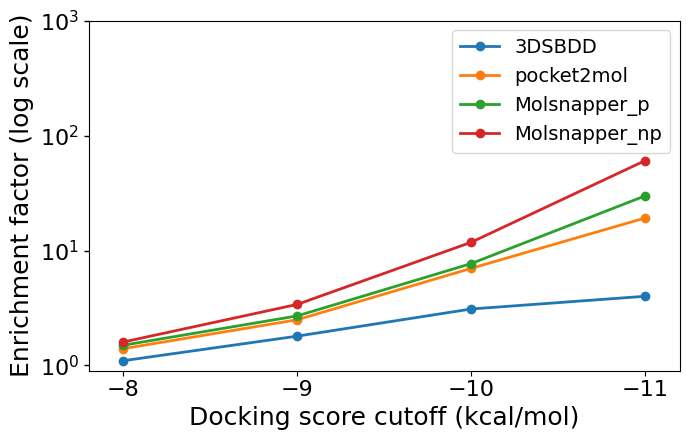

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Data from your table
thresholds = np.array([-8, -9, -10, -11])  # x-axis cutoffs
redock = -10.4

ef = {
    "3DSBDD":              [1.1, 1.8, 3.1, 4.0],
    "pocket2mol":          [1.4, 2.5, 7.0, 19.2],
    "Molsnapper_p":    [1.5, 2.7, 7.7, 29.9],
    "Molsnapper_np": [1.6, 3.4, 11.8, 60.6],
}

fig, ax = plt.subplots(figsize=(7, 4.5))

# lines = {}
for label, vals in ef.items():
    vals = np.clip(vals, 1, None)
    ax.plot(thresholds, vals, marker="o", linewidth=2, label=label)
    # lines[label] = ln


# Redock score marker as a vertical reference line
# ax.axvline(redock, linestyle="--", linewidth=1.5, label="Redock score (-10.4)")

# # --- NEW: EF at redock (from your table) ---
# ef_at_redock = {
#     "3DSBDD": 3.8,
#     "pocket2mol": 10.7,
#     "Molsnapper_nonpharm": 22.2,
#     "Molsnapper_pharm": 13.0,
# }

# for label, v in ef_at_redock.items():
#     ax.scatter([redock], [v], s=60, color=lines[label].get_color(), zorder=4)

# Axes & scales
ax.set_xlim(-11.2, -7.8)
ax.invert_xaxis() 
ax.set_xticks(thresholds)
ax.tick_params(axis='x', labelsize=16)
ax.set_xlabel("Docking score cutoff (kcal/mol)", fontsize=18)

ax.set_yscale("log")         # log10 scale
ax.set_ylim(0, 1e3)          # 10^0 to 10^4
ax.tick_params(axis='y', labelsize=16, width=1)
ax.set_ylabel("Enrichment factor (log scale)", fontsize=18)

ax.minorticks_off()                # <- remove small (minor) ticks
ax.legend(fontsize=14)

# ax.grid(True, which="both", axis="y", alpha=0.3)
ax.grid(False)
plt.tight_layout()
plt.savefig("/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/three_proteins/figures/7wf5_ef.png",
            dpi=600, bbox_inches="tight")
plt.show()


5l7i:

/tmp/ipykernel_1614860/3544049549.py:46: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1e3)          # 10^0 to 10^4


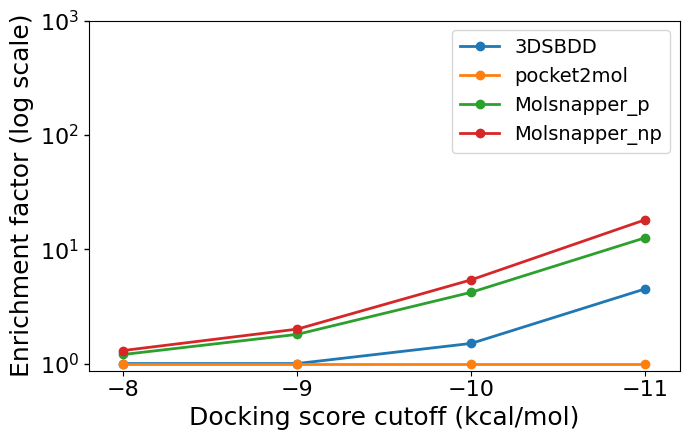

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Data from your table
thresholds = np.array([-8, -9, -10, -11])  # x-axis cutoffs
redock = -10.4

ef = {
    "3DSBDD":              [0.7, 0.8, 1.5, 4.5],
    "pocket2mol":          [0.8, 0.7, 0.6, 0.3],
    "Molsnapper_p":    [1.2, 1.8, 4.2, 12.6],
    "Molsnapper_np": [1.3, 2.0, 5.4, 18.1],
}

fig, ax = plt.subplots(figsize=(7, 4.5))

# lines = {}
for label, vals in ef.items():
    vals = np.clip(vals, 1, None)
    ax.plot(thresholds, vals, marker="o", linewidth=2, label=label)
    # lines[label] = ln


# Redock score marker as a vertical reference line
# ax.axvline(redock, linestyle="--", linewidth=1.5, label="Redock score (-10.4)")

# # --- NEW: EF at redock (from your table) ---
# ef_at_redock = {
#     "3DSBDD": 3.8,
#     "pocket2mol": 10.7,
#     "Molsnapper_nonpharm": 22.2,
#     "Molsnapper_pharm": 13.0,
# }

# for label, v in ef_at_redock.items():
#     ax.scatter([redock], [v], s=60, color=lines[label].get_color(), zorder=4)

# Axes & scales
ax.set_xlim(-11.2, -7.8)
ax.invert_xaxis() 
ax.set_xticks(thresholds)
ax.tick_params(axis='x', labelsize=16)
ax.set_xlabel("Docking score cutoff (kcal/mol)", fontsize=18)

ax.set_yscale("log")         # log10 scale
ax.set_ylim(0, 1e3)          # 10^0 to 10^4
ax.tick_params(axis='y', labelsize=16, width=1)
ax.set_ylabel("Enrichment factor (log scale)", fontsize=18)

ax.minorticks_off()                # <- remove small (minor) ticks
ax.legend(fontsize=14)

# ax.grid(True, which="both", axis="y", alpha=0.3)
ax.grid(False)
plt.tight_layout()
plt.savefig("/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/three_proteins/figures/5l7i_ef.png",
            dpi=600, bbox_inches="tight")
plt.show()


7cky:

/tmp/ipykernel_1614860/2978507768.py:46: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1e3)          # 10^0 to 10^4


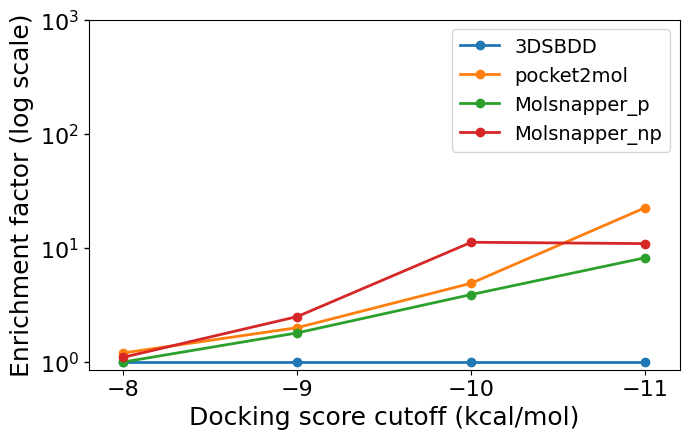

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Data from your table
thresholds = np.array([-8, -9, -10, -11])  # x-axis cutoffs
redock = -10.4

ef = {
    "3DSBDD":              [0.3, 0.0, 0.0, 0.0],
    "pocket2mol":          [1.2, 2.0, 4.9, 22.5],
    "Molsnapper_p":    [0.9, 1.8, 3.9, 8.2],
    "Molsnapper_np": [1.1, 2.5, 11.2, 10.9],
}

fig, ax = plt.subplots(figsize=(7, 4.5))

# lines = {}
for label, vals in ef.items():
    vals = np.clip(vals, 1, None)
    ax.plot(thresholds, vals, marker="o", linewidth=2, label=label)
    # lines[label] = ln


# Redock score marker as a vertical reference line
# ax.axvline(redock, linestyle="--", linewidth=1.5, label="Redock score (-10.4)")

# # --- NEW: EF at redock (from your table) ---
# ef_at_redock = {
#     "3DSBDD": 3.8,
#     "pocket2mol": 10.7,
#     "Molsnapper_nonpharm": 22.2,
#     "Molsnapper_pharm": 13.0,
# }

# for label, v in ef_at_redock.items():
#     ax.scatter([redock], [v], s=60, color=lines[label].get_color(), zorder=4)

# Axes & scales
ax.set_xlim(-11.2, -7.8)
ax.invert_xaxis() 
ax.set_xticks(thresholds)
ax.tick_params(axis='x', labelsize=16)
ax.set_xlabel("Docking score cutoff (kcal/mol)", fontsize=18)

ax.set_yscale("log")         # log10 scale
ax.set_ylim(0, 1e3)          # 10^0 to 10^4
ax.tick_params(axis='y', labelsize=16, width=1)
ax.set_ylabel("Enrichment factor (log scale)", fontsize=18)

ax.minorticks_off()                # <- remove small (minor) ticks
ax.legend(fontsize=14)

# ax.grid(True, which="both", axis="y", alpha=0.3)
ax.grid(False)
plt.tight_layout()
plt.savefig("/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/three_proteins/figures/7cky_ef.png",
            dpi=600, bbox_inches="tight")
plt.show()
